### 分析タイトル：日本とアジア諸国の幸福度比較と要因分析

## 序論


本レポートでは `world_happiness_report.csv` を用い、世界およびアジア地域の幸福度を比較し、経済（GDP per Capita）、健康、自由などの要因が幸福度に与える影響を評価します。


研究質問：


1. 地域ごとに幸福度に有意な差はあるか。


2. 経済指標は幸福度とどの程度相関するか。


3. 日本の年次変化に特徴はあるか。


方法：データ読み込み→前処理→集計（地域別平均）→相関分析→可視化→考察、の順で進めます。

## データ読み込みと確認

In [1]:
# ライブラリ読み込み
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# CSV 読み込み（同フォルダに world_happiness_report.csv を置く）
df = pd.read_csv('world_happiness_report.csv')

# 表示のための基本確認
print('shape:', df.shape)
display(df.head())
display(df.describe(include='all'))

shape: (1231, 14)


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,617,315,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
unique,NaN,192,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Switzerland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,615.000000,NaN,NaN,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,NaN,NaN,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,NaN,NaN,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,NaN,NaN,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,NaN,NaN,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,NaN,NaN,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000


C:\Users\ryoya\AppData\Local\Temp\ipykernel_10900\2548444030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=region_mean.index, y=region_mean.values, palette='viridis')


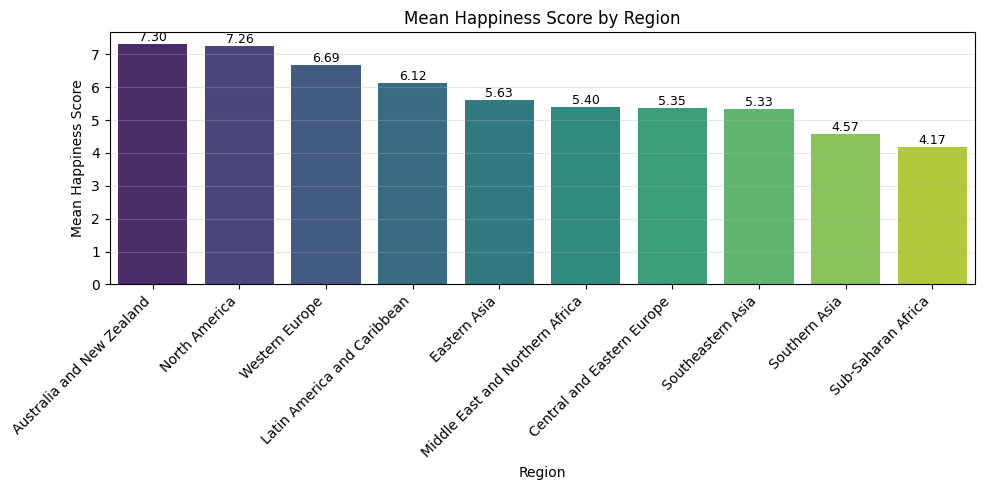

In [ ]:
# 地域別平均を計算（'Region' と 'Happiness Score' が存在する前提）
if 'Region' in df.columns and 'Happiness Score' in df.columns:
    region_mean = df.groupby('Region', dropna=False)['Happiness Score'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=region_mean.index, y=region_mean.values, palette='viridis')
    # 棒の上に平均値を表示
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='bottom', fontsize=9)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Mean Happiness Score')
    plt.xlabel('Region')
    plt.title('Mean Happiness Score by Region')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print('Region or Happiness Score column not found')

## 説明（図：地域別平均）


この棒グラフは地域ごとの平均 `Happiness Score` を示しています。各棒の上に平均値（小数第二位）を表示しており、地域間の差を定量的に評価できます。観察ポイント:


- 上位の地域は平均スコアが高く、生活水準や健康指標が高い傾向がある可能性がある。


- 下位の地域はスコアの分散を確認し、箱ひげ図や国別データで特異値の有無を確認してください。


- 本図は平均値のみを示すため、分布（箱ひげ図）やサンプル数も合わせて評価することが重要です。

Correlation (Economy vs Happiness):
                          Economy (GDP per Capita)  Happiness Score
Economy (GDP per Capita)                  1.000000         0.779171
Happiness Score                           0.779171         1.000000


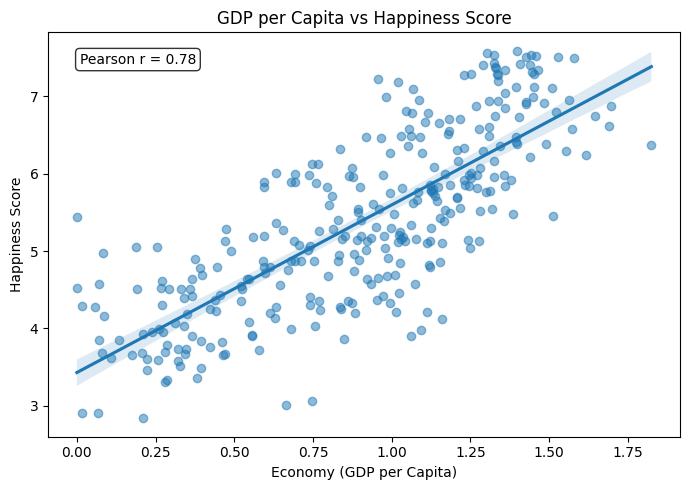

In [ ]:
# 相関と散布図（欠損除去）
if 'Economy (GDP per Capita)' in df.columns and 'Happiness Score' in df.columns:
    sub = df[['Economy (GDP per Capita)','Happiness Score']].dropna()
    corr = sub.corr().iloc[0,1]
    print('Correlation (Economy vs Happiness):')
    print(sub.corr())
    plt.figure(figsize=(7,5))
    sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score', data=sub, scatter_kws={'alpha':0.5})
    plt.title('GDP per Capita vs Happiness Score')
    plt.xlabel('Economy (GDP per Capita)')
    plt.ylabel('Happiness Score')
    # 図内に相関係数を表示
    plt.annotate(f"Pearson r = {corr:.2f}", xy=(0.05,0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top', bbox=dict(boxstyle='round', fc='white', alpha=0.8))
    plt.tight_layout()
    plt.show()
else:
    print('Economy or Happiness Score column not found')

## 説明（図：経済と幸福度の相関）


この散布図は各国の `Economy (GDP per Capita)` と `Happiness Score` の関係を示します。回帰直線と図中の Pearson 相関係数（r）を表示しています。解釈のポイント:


- 相関係数が正であれば、GDP の高さが一般に高い幸福度と関連することを示しますが、相関は因果を意味しません。


- 散布図の点の分布を見て、外れ値（非常に高いGDPだが低い幸福度など）を確認してください。外れ値は解釈に影響します。


- 必要に応じて対数変換や多変量回帰で他要因（健康・自由）を同時に評価してください。

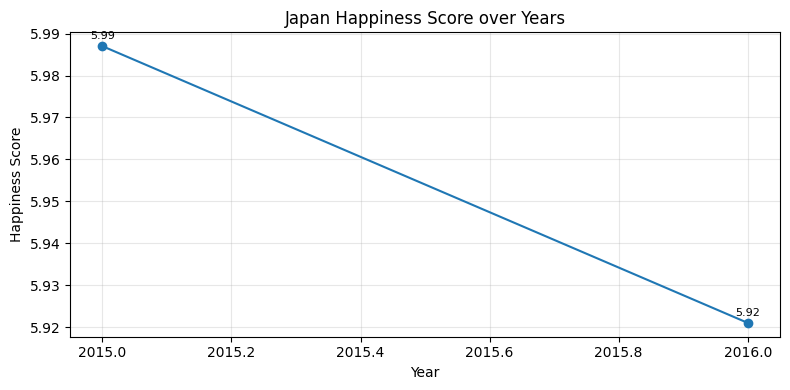

In [ ]:
# 日本の年次推移表示
if 'Country' in df.columns and 'year' in df.columns and 'Happiness Score' in df.columns:
    japan = df[df['Country'] == 'Japan']
    if not japan.empty:
        japan_ts = japan.sort_values('year')
        plt.figure(figsize=(8,4))
        plt.plot(japan_ts['year'], japan_ts['Happiness Score'], marker='o')
        # 各点に値を表示
        for x,y in zip(japan_ts['year'], japan_ts['Happiness Score']):
            plt.annotate(f"{y:.2f}", (x,y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
        plt.title('Japan Happiness Score over Years')
        plt.xlabel('Year')
        plt.ylabel('Happiness Score')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print('No Japan rows found')
else:
    print('Country or year column not found')

**説明（図：日本の時系列）**


日本の時系列プロットは年ごとの `Happiness Score` の変化を示します。各点にスコアを表示しているため、増減のタイミングを正確に把握できます。考察のヒント:


- スコアの増減と政治・経済イベント（例：景気変動、パンデミック、政策変更）を照らし合わせる。


- 年によるデータの欠損やサンプル数の変動がないか確認する。


- 必要なら移動平均や時系列分解でトレンドを確認してください。

## 補足可視化：分布と地域ごとの箱ひげ図

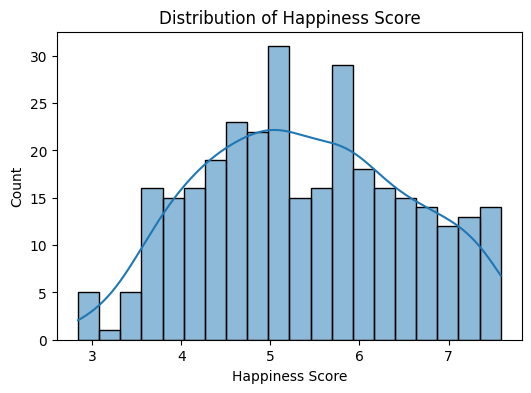

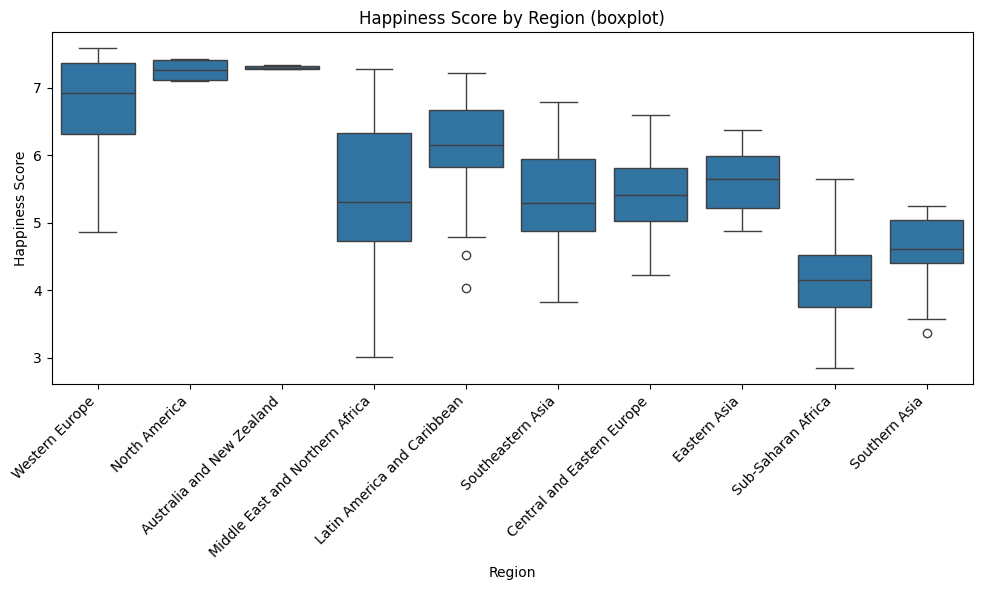

In [ ]:
# ヒストグラム（Happiness Score の分布）
if 'Happiness Score' in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df['Happiness Score'].dropna(), bins=20, kde=True)
    plt.title('Distribution of Happiness Score')
    plt.show()

# 地域ごとの箱ひげ図（存在する場合）
if 'Region' in df.columns and 'Happiness Score' in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Region', y='Happiness Score', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Happiness Score by Region (boxplot)')
    plt.tight_layout()
    plt.show()

**説明（図：地域ごとの箱ひげ図）**


この箱ひげ図は各地域の `Happiness Score` の分布（中央値・四分位範囲・外れ値）を示しています。読み方と留意点:


- 箱の中央線は中央値、箱の上下は第1・第3四分位数を表します。


- ひげはデータの広がりを示し、箱から外れた点は外れ値の可能性があります。外れ値は国別の特異事例なので、該当国のデータ（年・サンプル数・その他指標）を確認してください。


- 平均値だけでなく分布を観察することで、同一地域内での不均一性（ばらつき）や極端な値の影響を把握できます。


- 解釈時はサンプル数（各地域の国数）やデータの年次分布にも注意してください。

## 結論（まとめ）


本解析での主要な所見を簡潔にまとめます。


- 地域差: 地域別平均では顕著な差が見られ、上位地域と下位地域で平均に差があり、分布のばらつきも観察される。


- GDPとの関係: GDP（Economy）は幸福度と正の相関を示したが、中程度の相関であり単独要因ではない。


- 日本: 日本の年次変動は明確な一方向のトレンドではなく、特定年の変動と外的要因の照合が有益。


- 留意事項: 観察データであり因果を直接示すものではない。欠損やデータ品質に注意すること。


今後は必要に応じて多変量解析や外れ値のケーススタディを実施してください。